<a href="https://colab.research.google.com/github/ArunavG16/LGMVIP-tasks/blob/main/terrorismipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LETS GROW MORE

#DATA SCIENCE INTERNSHIP

**INTERMEDIATE LEVEL TASK**

TASK 3: EXPLORATORY DATA ANALYSIS ON DATASET TERRORISM

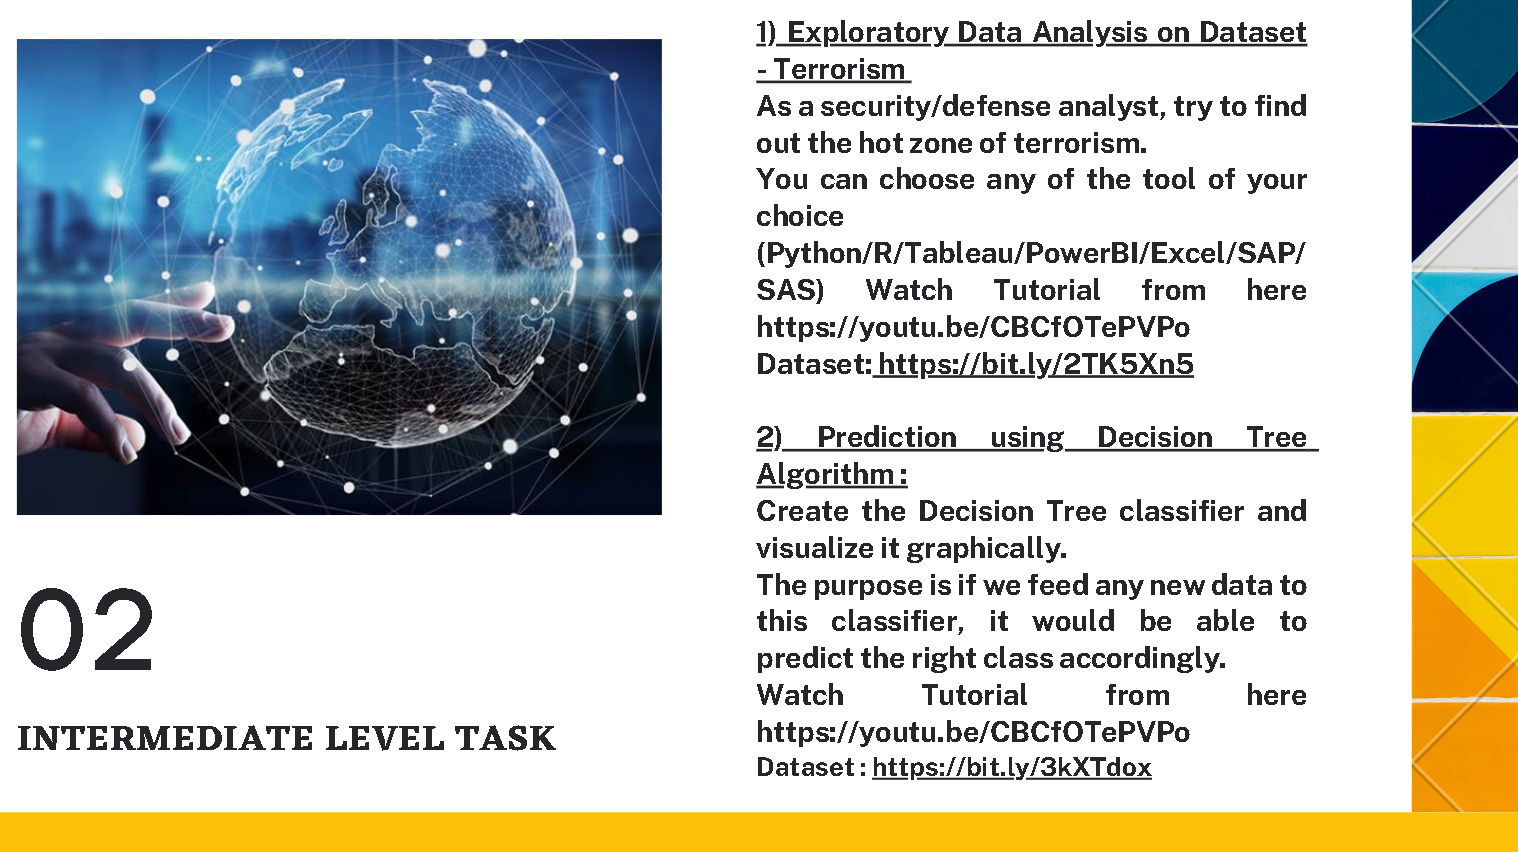

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


**Problem Statement**

As a security/defense analyst, try to find out the hot zone of terrorism.

You can choose any of the tool of your choice  

(Python/R/Tableau/PowerBI/Excel/SAP/SAS) 

#Loading Dataset

In [102]:
from google.colab import files
from google.colab import drive

In [103]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [104]:
data3 = pd.read_csv('/content/drive/MyDrive/data folder/globalterrorism.csv', encoding ='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Exploratory Data Analysis

In [105]:
data3.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [106]:
data3.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [107]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [108]:
data3.describe

<bound method NDFrame.describe of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  regi

In [109]:
data3.shape

(181691, 135)

In [110]:
data3.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [111]:
data3.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


In [112]:
data3.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [113]:
len(data3)

181691

In [114]:
len(data3.columns)

135

In [115]:
data3.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

In [116]:
data3.imonth.unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12])

In [117]:
data3.imonth.value_counts()

5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: imonth, dtype: int64

#Original Columns Value

In [118]:
col = data3.columns.to_list()
print(col)

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

**Exploring Data set**

In [119]:
data3.rename(columns= {"iyear":"Year", "imonth":"Month", " iday":"Day", "country_txt":"Country",
                   "region_txt":"Region", "provstate":"Province/State", "city":"City", "location":"Location",
                   "summary":"Summary" ,"attacktype1_txt":"Attack_Type" ,"targtype1_txt":"Target_Type",
                   "gname":"Group_Name", "motive":"Motive","weaptype1_txt":"Weapon_Type",
                   "nkill":"Killed", "nwound":"Wounded", "property": "Property", "addnotes":"Add_Notes"}, inplace = True)

In [120]:
data3.head()

,eventid,Year,Month,iday,approxdate,extended,resolution,country,Country,region,...,Add_Notes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


#Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6cc45dc090>,
      dtype=object)

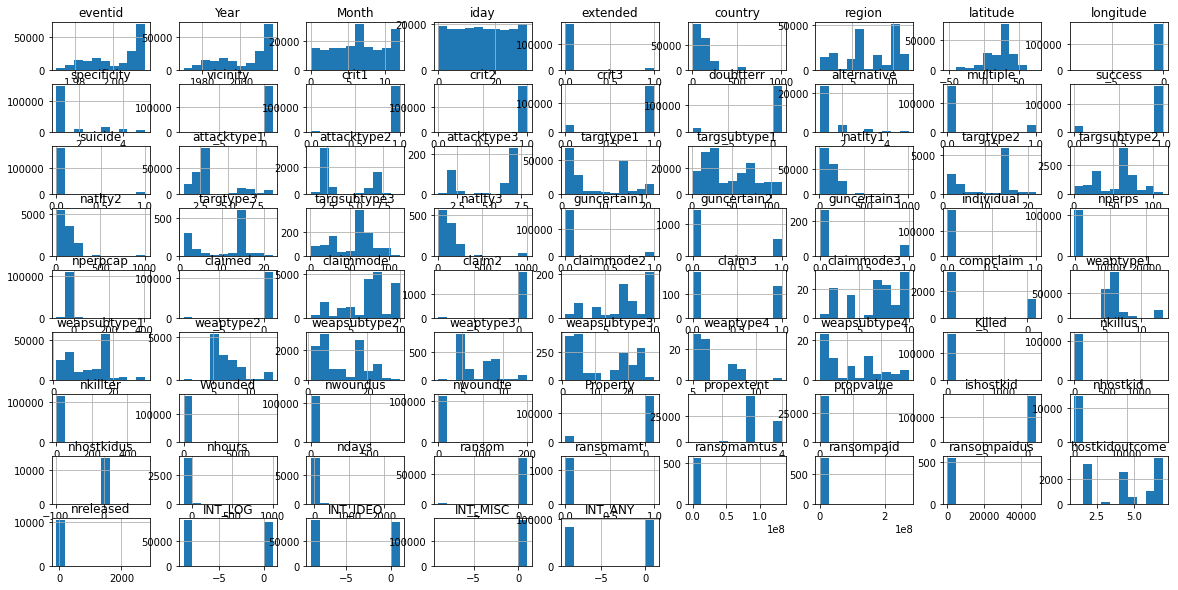

In [121]:
data3.hist(figsize=(20,10))

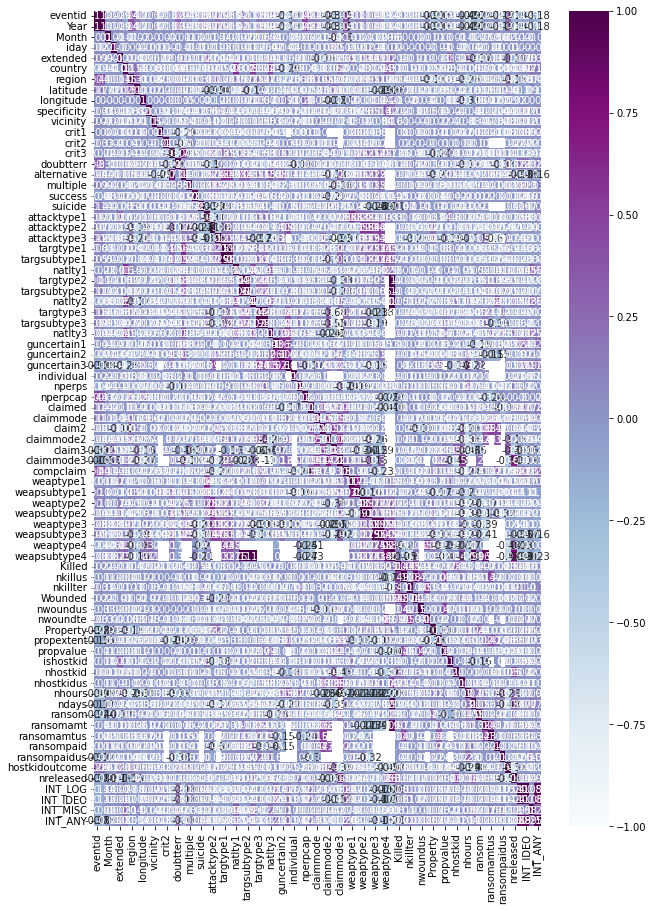

In [122]:
plt.figure(figsize=(10,15))
sns.heatmap(np.round(data3.corr(),2),annot=True, cmap='BuPu')

In [123]:
con = data3['Country'].value_counts().head(10)
con

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

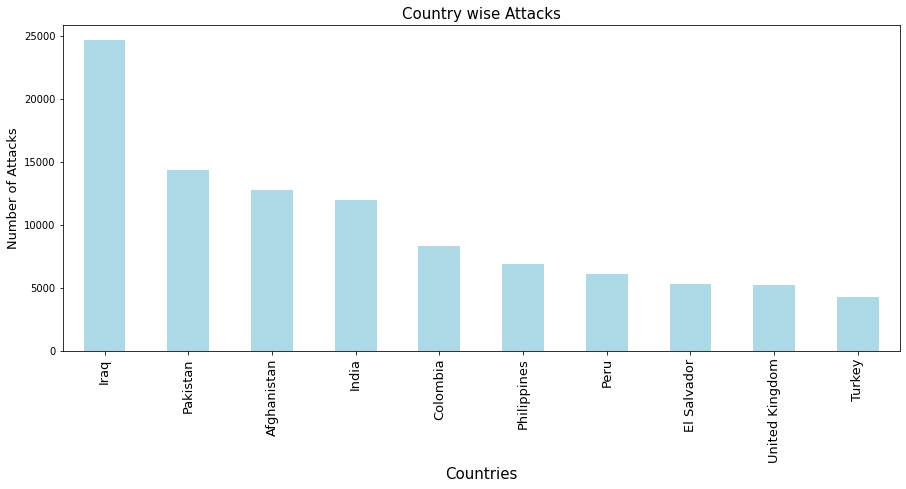

In [124]:
con.plot(kind="bar",color="lightblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=15)
plt.xlabel("Countries",fontsize=15)
plt.xticks(fontsize=13)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [125]:
con_killed = data3[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed", ascending  =False)
con_killed.head(10)

,Killed
Country,
Iraq,78589.0
Afghanistan,39384.0
Pakistan,23822.0
Nigeria,22682.0
India,19341.0
Sri Lanka,15530.0
Syria,15229.0
Colombia,14698.0
Peru,12771.0


#Terrorist activites by Region in each year through area plot

Text(0, 0.5, 'Number of Attacks')

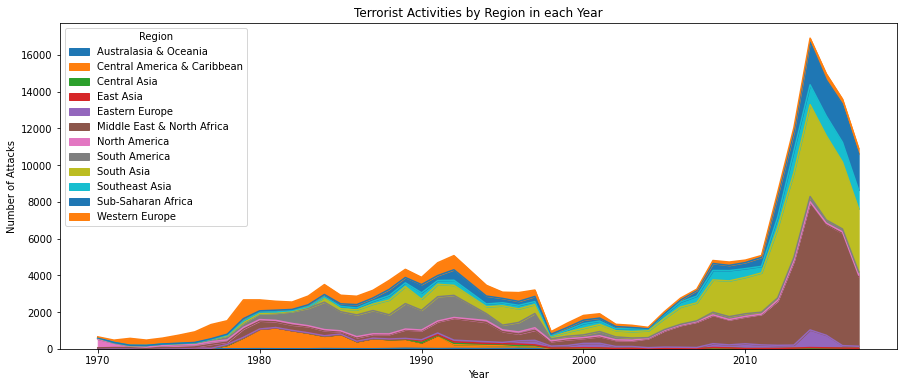

In [126]:
pd.crosstab(data3.Year, data3.Region).plot(kind='area' , figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')

#Number of Terrorist Activites Each Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


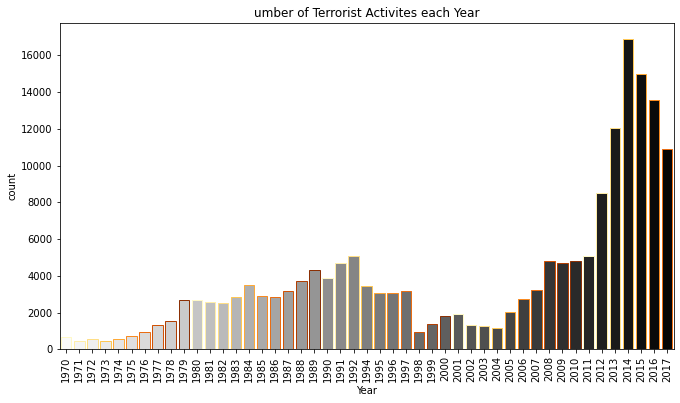

In [127]:
plt.subplots(figsize=(11,6))
sns.countplot('Year',data=data3,palette='gist_gray_r',edgecolor=sns.color_palette("YlOrBr",10))
plt.xticks(rotation =90)
plt.title('umber of Terrorist Activites each Year')
plt.show()

**Wounded**

In [128]:
month_wounded = data3[["Month", "Wounded"]].groupby("Month").sum().sort_values(by = 'Month')
month_wounded

,Wounded
Month,
0,0.0
1,35097.0
2,37030.0
3,49929.0
4,40675.0
5,45224.0
6,41370.0
7,47151.0
8,50687.0


Text(0, 0.5, 'Number of People Wounded')

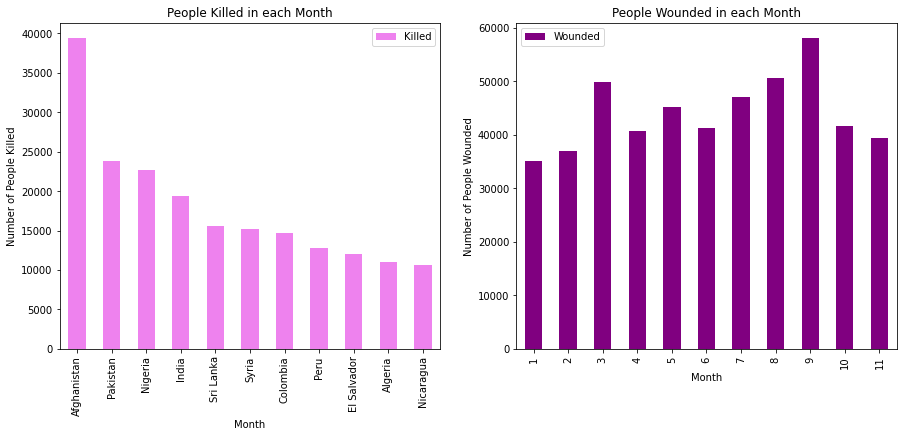

In [129]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

con_killed[1:12].plot(kind="bar",color="violet",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Month")
ax0.set_xlabel("Month")
ax0.set_ylabel("Number of People Killed")

month_wounded[1:12].plot(kind="bar",color="purple",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of People Wounded")

In [130]:
region_killed = data3[["Region", "Killed"]].groupby("Region").sum().sort_values(by = 'Killed', ascending = False)
region_killed

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [131]:
region_wounded = data3[["Region", "Wounded"]].groupby("Region").sum().sort_values(by = 'Wounded', ascending = False)
region_wounded

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0, 0.5, 'Number of People Wounded')

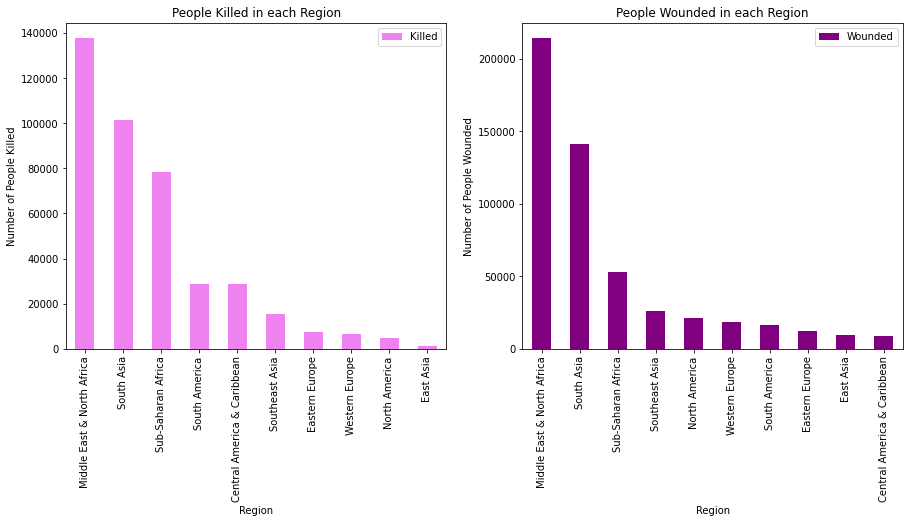

In [132]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

region_killed[:10].plot(kind="bar",color="violet",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Region")
ax0.set_ylabel("Number of People Killed")

region_wounded[:10].plot(kind="bar",color="purple",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Number of People Wounded")

**Region with Most Attacks**

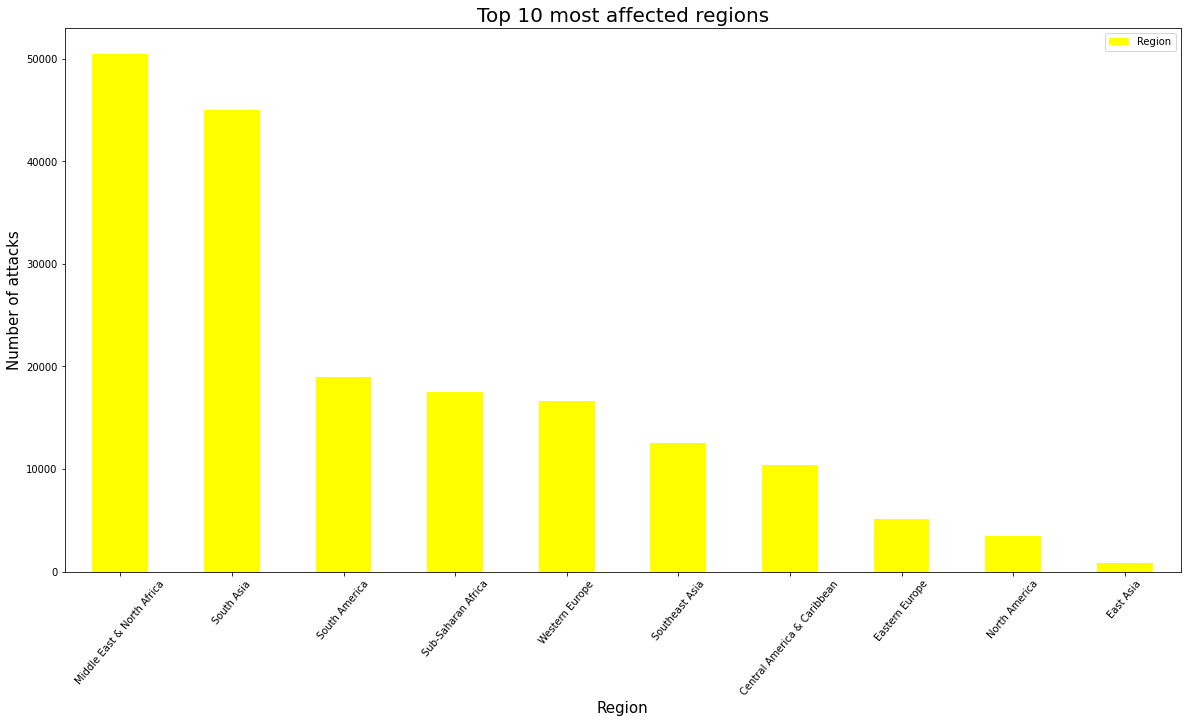

In [133]:
data3['Region'].value_counts().to_frame().sort_values('Region',axis=0,ascending=False).head(10).plot(kind='bar',figsize=(20,10),color='yellow')
plt.xticks(rotation = 50)
plt.xlabel("Region",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Top 10 most affected regions",fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


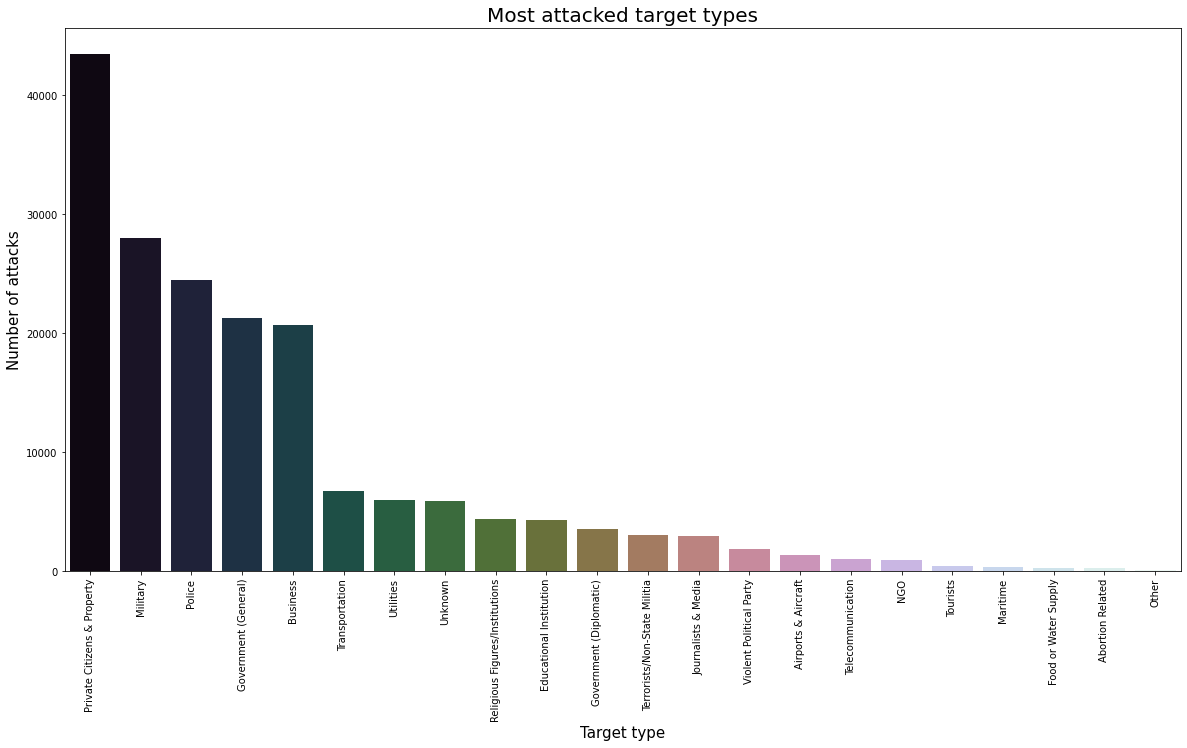

In [134]:
plt.subplots(figsize=(20,10))
sns.countplot(data3["Target_Type"],order=data3['Target_Type'].value_counts().index,palette="cubehelix");
plt.xticks(rotation=90)
plt.xlabel("Target type",fontsize=15)
plt.ylabel("Number of attacks",fontsize=15)
plt.title("Most attacked target types",fontsize=20)
plt.show()

#**Conclusion**

Most attacked country - Iraq

Most attacked city - Baghdad

Most attacked target type - Private Citizens and Property

Most attacked region - Middle East and North Africa

Terrorist group with most attacks - Islamic State of Iraq and the Levant (ISIL)

Most used attack type - Bombing/Explosion

**I have completed my third task successfully**

**Thanking to LetsGrowMore and Special to Aman Kesarwani sir for this opportunity to improve and enhance my self in the field of DataScience**